In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

# Read total articles with csv file

In [2]:
df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/FULL_TEXT_WORD_TOKENS.csv')
df_transcript.head()
#df_transcript.tail()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/FULL_TEXT_WORD_TOKENS.csv'

In [3]:
df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/TED_EN_KO_ZH.csv')
df_transcript.head()
#df_transcript.tail()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/TED_EN_KO_ZH.csv'

In [ ]:
df_transcript = df_transcript.to_dict(orient='dict')

In [ ]:
ESENT = []
KSENT = []
ZSENT = []
for i in range(len(df_transcript['ENGLISH'])):
  ESENT.append(df_transcript['ENGLISH'][i])
  KSENT.append(df_transcript['KOREAN'][i])
  ZSENT.append(df_transcript['CHINESE(ZH-TW)'][i])

In [ ]:
df_transcript = []

# Read sentence for each article csv file.

In [4]:
#df_train_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TRAIN_ALL.csv')
df_train_transcript = pd.read_csv('./MERGE/TRAIN_ALL.csv')
df_train_transcript = df_train_transcript.to_dict(orient='dict')
TRAIN_ESENT = (list(df_train_transcript['EN'].values()))
TRAIN_KSENT = (list(df_train_transcript['KO'].values()))
TRAIN_ZSENT = (list(df_train_transcript['ZH-TW'].values()))
df_train_transcript = []

In [5]:
#df_test_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TEST_ALL.csv')
df_test_transcript = pd.read_csv('./MERGE/TEST_ALL.csv')
df_test_transcript = df_test_transcript.to_dict(orient='dict')
TEST_ESENT = (list(df_test_transcript['EN'].values()))
TEST_KSENT = (list(df_test_transcript['KO'].values()))
TEST_ZSENT = (list(df_test_transcript['ZH-TW'].values()))
df_test_transcript = []

In [ ]:
#total_article_len = 4937

In [ ]:
'''TRAIN_ESENT = []
TRAIN_KSENT = []
TRAIN_ZSENT = []
TEST_ESENT = []
TEST_KSENT = []
TEST_ZSENT = []'''

In [ ]:
# 載入訓練集和測試集的索引
train_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy')
test_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy')

In [ ]:
'''
for j in train_indices:
  df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/{}.csv'.format(j+1))
  df_transcript = df_transcript.to_dict(orient='dict')
  TRAIN_ESENT += (list(df_transcript['EN'].values()))
  TRAIN_KSENT += (list(df_transcript['KO'].values()))
  TRAIN_ZSENT += (list(df_transcript['ZH-TW'].values()))
  print('{}.csv read'.format(j+1))
  '''

In [ ]:
'''
df_train_transcript = pd.DataFrame({'EN':TRAIN_ESENT,'KO':TRAIN_KSENT,'ZH-TW':TRAIN_ZSENT})
df_train_transcript.to_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TRAIN_ALL.csv',index=False)'''

In [ ]:
'''
for j in test_indices:
  df_transcript = pd.read_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/{}.csv'.format(j+1))
  df_transcript = df_transcript.to_dict(orient='dict')
  TEST_ESENT += (list(df_transcript['EN'].values()))
  TEST_KSENT += (list(df_transcript['KO'].values()))
  TEST_ZSENT += (list(df_transcript['ZH-TW'].values()))
  print('{}.csv read'.format(j+1))'''

In [ ]:
'''
df_test_transcript = pd.DataFrame({'EN':TEST_ESENT,'KO':TEST_KSENT,'ZH-TW':TEST_ZSENT})
df_test_transcript.to_csv('/content/drive/MyDrive/ZH-KO-TRANSLATOR/CORPUS/ALIGNED/MERGE/TEST_ALL.csv',index=False)'''

# Pretrain Model

In [ ]:
'''
from sklearn.model_selection import train_test_split
import numpy as np

# 使用 train_test_split 函數將資料集分為訓練集和測試集，並獲取索引
train_indices, test_indices = train_test_split(
    np.arange(len(ZSENT)), test_size=0.2, random_state=42)

# test_size 參數可以設置測試集的比例，例如 0.2 表示測試集占整個資料集的 20%
# random_state 參數可用於設置隨機種子，確保每次運行結果都是相同的

# 現在您可以將 train_indices 和 test_indices 用於存儲索引

# 將索引存儲到文件中
np.save('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy', train_indices)
np.save('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy', test_indices)
'''

In [ ]:
'''
import numpy as np

# 載入訓練集和測試集的索引
train_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/train_indices.npy')
test_indices = np.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/INDEX/test_indices.npy')

# 使用索引來選擇訓練集和測試集的相應資料
train_source_sentences = [ZSENT[i] for i in train_indices]
train_target_sentences = [KSENT[i] for i in train_indices]
test_source_sentences = [ZSENT[i] for i in test_indices]
test_target_sentences = [KSENT[i] for i in test_indices]

# 現在您可以使用 train_source_sentences、train_target_sentences、
# test_source_sentences 和 test_target_sentences 來訓練和測試您的模型。
'''

In [6]:
import torch
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader
from transformers import BertConfig, BertForMaskedLM
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time

In [27]:
!nvidia-smi

Sat Apr 13 13:39:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:08:00.0 Off |                  N/A |
|  0%   39C    P8             17W /  340W |    7242MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [28]:
# 設定訓練參數
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
max_length = 64
batch_size = 16
#batch_size = 32
learning_rate = 1e-4
num_epochs = 2

In [29]:
print(device)

cuda


In [10]:
# 加載預訓練的BERT模型和分詞器
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased').to(device)

In [11]:
# 假設您有一個平行語料庫，這是您的資料集
class TranslationDataset(Dataset):
    def __init__(self, source_sentences, target_sentences):
        self.source_sentences = source_sentences
        self.target_sentences = target_sentences
        self.length = len(source_sentences)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        source = self.source_sentences[index]
        target = self.target_sentences[index]
        return source, target


In [12]:
# 建立模型
class TranslationModel(nn.Module):
    def __init__(self, bert_model):
        super(TranslationModel, self).__init__()
        self.bert = bert_model
        self.linear = nn.Linear(self.bert.config.hidden_size, tokenizer.vocab_size)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        prediction_scores = self.linear(outputs.last_hidden_state)
        return prediction_scores


In [13]:
# 載入資料集
train_source_sentences = TRAIN_ZSENT  # 中文句子
train_target_sentences = TRAIN_KSENT  # 韓文句子
dataset = TranslationDataset(train_source_sentences, train_target_sentences)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [14]:
test_source_sentences = TEST_ZSENT  # 中文句子
test_target_sentences = TEST_KSENT  # 韓文句子
test_dataset = TranslationDataset(test_source_sentences, test_target_sentences)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [35]:
len_train_data = len(dataloader)
len_test_data = len(test_dataloader)
print(len_train_data,len_test_data)

9167 2256


In [15]:
# 初始化模型、損失函數和優化器
model = TranslationModel(bert_model).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
# 加載訓練好的模型
model = TranslationModel(bert_model).to(device)
#model.load_state_dict(torch.load('/content/drive/MyDrive/ZH-KO-TRANSLATOR/MODELS/translation_model(ZK1).pth'))#
model.load_state_dict(torch.load('./MODELS/best_translation_model(ZK1).pth'))

<All keys matched successfully>

In [17]:
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time/60)
  elapsed_secs = int(elapsed_time%60)
  return elapsed_mins, elapsed_secs

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from tqdm import tqdm

In [20]:
def train(path):
    global model, dataloader, optimizer, criterion, tokenizer
    model.train()
    total_loss = 0
    with tqdm(total = len(dataloader)) as pbar:
      for batch in dataloader:
        source_batch, target_batch = batch
        source_tokens = tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        target_tokens = tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)

        optimizer.zero_grad()
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        loss = criterion(output.transpose(1, 2), target_tokens.input_ids)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        pbar.update(1)
    torch.save(model.state_dict(), path)

    return total_loss

In [21]:
def evaluate():
  global model, test_dataloader, criterion, tokenizer
  model.eval()
  total_loss = 0
  with torch.no_grad():
    with tqdm(total = len(test_dataloader)) as pbar:
      for batch in test_dataloader:
        source_batch, target_batch = batch
        source_tokens = tokenizer(source_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)
        target_tokens = tokenizer(target_batch, padding='max_length', truncation=True, return_tensors='pt', max_length=max_length).to(device)

        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
        loss = criterion(output.transpose(1, 2), target_tokens.input_ids)

        total_loss += loss.item()
        pbar.update(1)

  return total_loss

In [31]:
def loss_history(train_loss_values, test_loss_values, path='', to_show=False):
  global len_train_data,len_test_data
  before_train_loss = []
  before_test_loss = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_train_loss = list(df_loss['TRAIN_LOSS'].values())
      before_test_loss = list(df_loss['TEST_LOSS'].values())
    except:
      before_train_loss = list(df_loss['TRAIN_LOSS'])
      before_test_loss = list(df_loss['TEST_LOSS'])


  except:
    before_train_loss = []
    before_test_loss = []

  if(len(before_train_loss)>0):
    train_loss_values = before_train_loss + train_loss_values
    test_loss_values = before_test_loss + test_loss_values

  train_loss_values = [value / len_train_data for value in train_loss_values]
  test_loss_values = [value / len_test_data for value in test_loss_values]

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(train_loss_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, train_loss_values, 'b', label='Training loss')
  plt.plot(epochs, test_loss_values, 'r', label='Test loss')
  plt.title('Training and Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/loss_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'TRAIN_LOSS':train_loss_values,'TEST_LOSS':test_loss_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/loss_plot_{}.csv'.format(path),index=False)

In [32]:
def bleu_history(bleu_score_values, path='', to_show=False):
  before_bleu_score = []
  try:
    df_loss = pd.read_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path))
    df_loss.to_dict(orient='dict')

    try:
      before_bleu_score = list(df_loss['BLEU_SCORE'].values())
    except:
      before_bleu_score = list(df_loss['BLEU_SCORE'])


  except:
    before_bleu_score = []

  if(len(before_bleu_score)>0):
    bleu_score_values = before_bleu_score + bleu_score_values

  # 假設您有每個 epoch 的索引
  epochs = range(1, len(bleu_score_values) + 1)
  plt.clf()

  # 繪製訓練損失和測試損失的折線圖
  plt.plot(epochs, bleu_score_values, 'b', label='Training loss')
  plt.title('BLEU SCORE')
  plt.xlabel('Epochs')
  plt.ylabel('Score')
  plt.legend()

  # 儲存折線圖
  plt.savefig('./MODELS/LOSS_HISTORY/blue_plot_{}.png'.format(path))
  if to_show:
    plt.show()

  df_loss = pd.DataFrame({'BLEU_SCORE':bleu_score_values})
  df_loss.to_csv('./MODELS/LOSS_HISTORY/blue_plot_{}.csv'.format(path),index=False)

In [20]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction

def bleu_score(test_source_sentences,model,tokenizer,max_length,device):
  model.eval()

  # 生成目標語句
  generated_sentences = []
  with tqdm(total = len(test_source_sentences)) as pbar:
    for source_sentence in test_source_sentences:
      source_tokens = tokenizer(source_sentence, padding=True, truncation=True, return_tensors='pt', max_length=max_length).to(device)
      with torch.no_grad():
        output = model(input_ids=source_tokens.input_ids, attention_mask=source_tokens.attention_mask)
      generated_sentence = tokenizer.decode(output[0].argmax(dim=-1), skip_special_tokens=True)
      generated_sentences.append(generated_sentence)
      pbar.update(1)


  # 計算 BLEU 分數
  smoothie = SmoothingFunction().method4
  bleu_score = corpus_bleu([[ref] for ref in test_target_sentences], generated_sentences, smoothing_function=smoothie)

  #print("BLEU 分數:", bleu_score)
  return bleu_score

In [24]:
#best_loss = float('inf')
best_loss = 6268.034
best_score = 0.088

In [25]:
train_losses = []
test_losses = []

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9167/9167 [24:35<00:00,  6.21it/s]


Epoch 01 | Train Time: 24m 42s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2256/2256 [01:21<00:00, 27.83it/s]


Epoch 01 | Test Time: 1m 21s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [06:35<00:00, 91.24it/s]


Epoch 01 | Eval Time: 6m 38s
	Train Loss: 12314.358 | Test Loss: 9107.136
	BLEU Score: 0.088


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9167/9167 [22:35<00:00,  6.76it/s]


Epoch 02 | Train Time: 22m 43s


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2256/2256 [02:23<00:00, 15.71it/s]


Epoch 02 | Test Time: 2m 23s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36089/36089 [07:45<00:00, 77.47it/s]


Epoch 02 | Eval Time: 7m 49s
	Train Loss: 12096.264 | Test Loss: 9130.264
	BLEU Score: 0.084


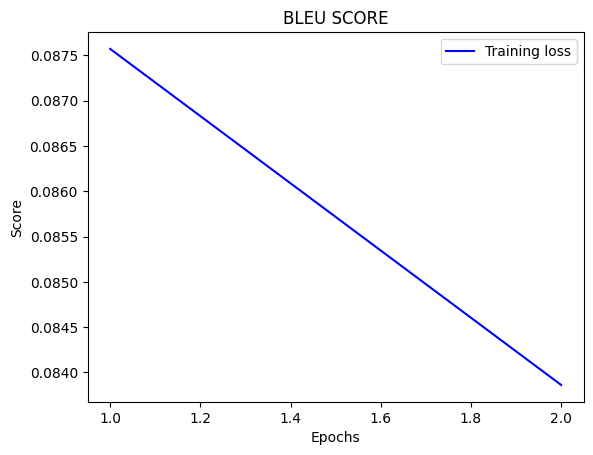

In [36]:
# 訓練模型
for epoch in range(num_epochs):
    train_losses = []
    test_losses = []
    blue_scores = []

    start_time = time.time()
    train_loss = train(path='./MODELS/translation_model(ZK1).pth')
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch {epoch+1:02} | Train Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    test_loss = evaluate()

    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Test Time: {epoch_mins}m {epoch_secs}s')

    start_time = time.time()
    score = bleu_score(test_source_sentences,model,tokenizer,max_length,device)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch {epoch+1:02} | Eval Time: {epoch_mins}m {epoch_secs}s')

    # 儲存訓練好的模型
    if(score > best_score):
    #if(test_loss < best_loss):
      best_score = score
      best_loss = test_loss
      torch.save(model.state_dict(), './MODELS/best_translation_model(ZK1).pth')
      print('== save model ==')
    print('\tTrain Loss: {:.3f} | Test Loss: {:.3f}'.format(train_loss, test_loss))
    print('\tBLEU Score: {:.3f}'.format(score))

    train_losses.append(train_loss)
    test_losses.append(test_loss)    
    blue_scores.append(score)

    loss_history(train_losses, test_losses, path='ZK1_AVG', to_show=False)    
    bleu_history(blue_scores, path='ZK1', to_show=False)

In [ ]:
bleu_score(test_source_sentences,model,tokenizer,max_length,device)